#### CS5691 Assignment 1 - Question 1 - PCA

##### Submitted by: Vennapareddy Abhigna, Roll Number: ME19B059

### (1) i. Write a piece of code to run the PCA algorithm on this data-set. How much of the variance in the data-set is explained by each of the principal components?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset.csv',header=None)
df.columns=['x','y']  # consider x as feature 1 and y as feature 2
shape=df.shape
n=shape[0] #number of data points (rows)
d=shape[1] #number of features (coluns)
df

,x,y
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


Text(0.5, 1.0, 'Data Points')

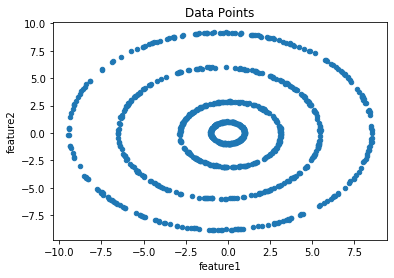

In [3]:
df.plot(x ='x', y='y', kind = 'scatter') #plotting given dataset
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Data Points')

In [4]:
data=df.to_numpy().transpose()

In [5]:
data # each data points corresponds to a column vector

array([[ 0.143  , -0.30467,  0.46625, ...,  6.1062 , -7.4094 , -0.12948],
       [ 0.98493,  0.98562, -0.84003, ..., -5.9864 , -5.5205 , -8.8036 ]])

In [6]:
# Data Centering
k=np.mean(data, axis=1)
mu_x = k[0]
mu_y = k[1]

In [7]:
mu_x

4.074999999685858e-07

In [8]:
mu_y

2.2270000000723655e-07

In [9]:
a=data[0,:]-mu_x
b=data[1,:]-mu_y
ab=np.vstack((a,b))
ab

array([[ 0.14299959, -0.30467041,  0.46624959, ...,  6.10619959,
        -7.40940041, -0.12948041],
       [ 0.98492978,  0.98561978, -0.84003022, ..., -5.98640022,
        -5.52050022, -8.80360022]])

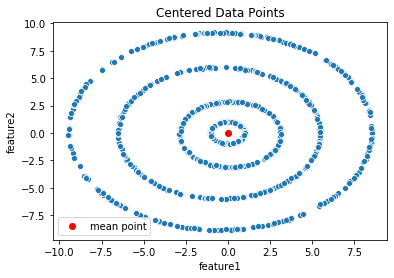

In [10]:
sns.scatterplot(ab[0,:],ab[1,:])
plt.scatter(k[0],k[1],color='red', label='mean point')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Centered Data Points')
plt.legend()

In [11]:
X=np.asmatrix(ab)
X

matrix([[ 0.14299959, -0.30467041,  0.46624959, ...,  6.10619959,
         -7.40940041, -0.12948041],
        [ 0.98492978,  0.98561978, -0.84003022, ..., -5.98640022,
         -5.52050022, -8.80360022]])

In [12]:
Xt=X.transpose()
Xt

matrix([[ 0.14299959,  0.98492978],
        [-0.30467041,  0.98561978],
        [ 0.46624959, -0.84003022],
        ...,
        [ 6.10619959, -5.98640022],
        [-7.40940041, -5.52050022],
        [-0.12948041, -8.80360022]])

In [13]:
C=np.matmul(X,Xt)/n  #co-variance matrix
C

matrix([[14.76615576,  0.80885904],
        [ 0.80885904, 16.85536339]])

In [14]:
# eigen vectors are the principle components and eigen values are the variance corresponding to that pc
eigenvalues, eigenvectors = np.linalg.eig(C)

s = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[s]
eigenvectors = eigenvectors[:,s]

In [15]:
eigenvalues

array([17.1319144 , 14.48960475])

In [16]:
eigenvectors   #each pc corresponds to a column vector mapped to corresponding eigen value.

matrix([[-0.323516 , -0.9462227],
        [-0.9462227,  0.323516 ]])

In [17]:
w1=np.array(eigenvectors[:,0]).flatten() #Principal Component 1
w2=np.array(eigenvectors[:,1]).flatten() #Principal Component 2

In [18]:
w1

array([-0.323516 , -0.9462227])

In [19]:
w2

array([-0.9462227,  0.323516 ])

In [20]:
print("Variance corresponding to principal component: ", w1, "is", eigenvalues[0]) #eigen values are the variance corresponding to that pc
print("Variance corresponding to principal component: ", w2, "is", eigenvalues[1])

Variance corresponding to principal component:  [-0.323516  -0.9462227] is 17.131914402444362
Variance corresponding to principal component:  [-0.9462227  0.323516 ] is 14.489604749330638


In [21]:
Percentage_variance_pc1_centered = (eigenvalues[0]/(eigenvalues[0]+eigenvalues[1]))*100   
Percentage_variance_pc2_centered = (eigenvalues[1]/(eigenvalues[0]+eigenvalues[1]))*100
print('pc1: ', Percentage_variance_pc1_centered, ', pc2: ',Percentage_variance_pc2_centered)

pc1:  54.17802452885222 , pc2:  45.82197547114778


In [22]:
new_X = np.array(np.matmul(Xt,eigenvectors))
new_X

array([[-0.97822557,  0.18333109],
       [-0.83405005,  0.60714983],
       [ 0.64401646, -0.71293917],
       ...,
       [ 3.68901448, -7.71452094],
       [ 7.62068223,  5.22497267],
       [ 8.37205534, -2.72558827]])

Text(0.5, 1.0, 'Data points projected on w1 and w2 using PCA')

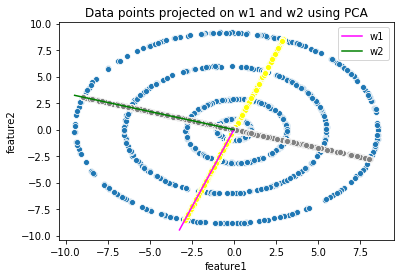

In [23]:
sns.scatterplot(ab[0,:],ab[1,:])
plt.scatter(k[0],k[1],color='red')
plt.plot([0,10*w1[0]],[0,10*w1[1]],color='magenta', label='w1')
plt.plot([0,10*w2[0]],[0,10*w2[1]],color='green',label='w2')
sns.scatterplot(new_X[:,0]*w1[0],new_X[:,0]*w1[1], color = 'yellow')
sns.scatterplot(new_X[:,1]*w2[0],new_X[:,1]*w2[1], color = 'grey')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.title('Data points projected on w1 and w2 using PCA')

### (1) ii. Study the effect of running PCA without centering the data-set. What are your observations? Does Centering help?

In [24]:
X_nc=np.asmatrix(data)
X_nc

matrix([[ 0.143  , -0.30467,  0.46625, ...,  6.1062 , -7.4094 , -0.12948],
        [ 0.98493,  0.98562, -0.84003, ..., -5.9864 , -5.5205 , -8.8036 ]])

In [25]:
Xt_nc=X_nc.transpose()
Xt_nc

matrix([[ 0.143  ,  0.98493],
        [-0.30467,  0.98562],
        [ 0.46625, -0.84003],
        ...,
        [ 6.1062 , -5.9864 ],
        [-7.4094 , -5.5205 ],
        [-0.12948, -8.8036 ]])

In [26]:
C_nc=np.matmul(X_nc,Xt_nc)/n
C_nc

matrix([[14.76615576,  0.80885904],
        [ 0.80885904, 16.85536339]])

In [27]:
# eigen vectors are the principle components and eigen values are the variance corresponding to that pc
eigenvalues_nc, eigenvectors_nc = np.linalg.eig(C_nc)

s_nc = eigenvalues_nc.argsort()[::-1]   
eigenvalues_nc = eigenvalues_nc[s_nc]
eigenvectors_nc = eigenvectors_nc[:,s_nc]

In [28]:
eigenvalues_nc

array([17.1319144 , 14.48960475])

In [29]:
eigenvectors_nc

matrix([[-0.323516 , -0.9462227],
        [-0.9462227,  0.323516 ]])

In [30]:
w1_nc=np.array(eigenvectors_nc[:,0]).flatten()
w2_nc=np.array(eigenvectors_nc[:,1]).flatten()

In [31]:
print("Variance corresponding to principal component: ", w1_nc, "is", eigenvalues_nc[0])
print("Variance corresponding to principal component: ", w2_nc, "is", eigenvalues_nc[1])

Variance corresponding to principal component:  [-0.323516  -0.9462227] is 17.13191440244448
Variance corresponding to principal component:  [-0.9462227  0.323516 ] is 14.489604749330741


In [32]:
print(eigenvalues_nc[0]>eigenvalues[0])
print(eigenvalues_nc[1]>eigenvalues[1])

True
True


In [33]:
Percentage_variance_pc1_uncentered = (eigenvalues_nc[0]/(eigenvalues_nc[0]+eigenvalues_nc[1]))*100
Percentage_variance_pc2_uncentered = (eigenvalues_nc[1]/(eigenvalues_nc[0]+eigenvalues_nc[1]))*100
print('pc1: ', Percentage_variance_pc1_uncentered, ', pc2: ',Percentage_variance_pc2_uncentered)

pc1:  54.178024528852205 , pc2:  45.82197547114779


In [34]:
new_X_nc = np.array(np.matmul(Xt_nc,eigenvectors_nc))
new_X_nc

array([[-0.97822591,  0.18333077],
       [-0.83405039,  0.60714951],
       [ 0.64401612, -0.71293948],
       ...,
       [ 3.68901414, -7.71452125],
       [ 7.62068189,  5.22497236],
       [ 8.372055  , -2.72558858]])

Text(0.5, 1.0, 'Data points projected on w1 and w2 using PCA')

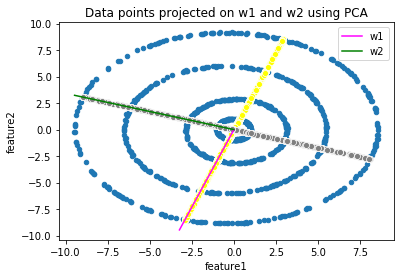

In [35]:
df.plot(x ='x', y='y', kind = 'scatter')
plt.plot([0,10*w1_nc[0]],[0,10*w1_nc[1]],color='magenta', label='w1')
plt.plot([0,10*w2_nc[0]],[0,10*w2_nc[1]],color='green',label='w2')
sns.scatterplot(new_X_nc[:,0]*w1_nc[0],new_X_nc[:,0]*w1_nc[1], color = 'yellow')
sns.scatterplot(new_X_nc[:,1]*w2_nc[0],new_X_nc[:,1]*w2_nc[1], color = 'grey')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.title('Data points projected on w1 and w2 using PCA')

### (1) iii. Write a piece of code to implement the Kernel PCA algorithm on this dataset. Plot the projection of each point in the dataset onto the top-2 components for each kernel. Use one plot for each kernel and in the case of (B), use a different plot for each value of σ

#### A. k(x, y) = (1 + xT y)^d for d = {2, 3}

###### For d=2:

In [36]:
p=2
K=np.empty([1000,1000])
for i in range(n):
    for j in range(n):
        K[i][j]=np.power((sum(np.multiply(data[:,i],data[:,j]))+1),p)

In [37]:
K

array([[3.96223398e+00, 3.71409559e+00, 5.72659268e-02, ...,
        1.61845157e+01, 3.02153628e+01, 5.91275704e+01],
       [3.71409559e+00, 4.26121308e+00, 8.99834642e-04, ...,
        4.57069499e+01, 4.76851648e+00, 5.83322549e+01],
       [5.72659268e-02, 8.99834642e-04, 3.69808078e+00, ...,
        7.87793169e+01, 4.76441007e+00, 6.94708590e+01],
       ...,
       [1.61845157e+01, 4.57069499e+01, 7.87793169e+01, ...,
        5.49416923e+03, 1.25336020e+02, 2.79959935e+03],
       [3.02153628e+01, 4.76851648e+00, 4.76441007e+00, ...,
        1.25336020e+02, 7.46066284e+03, 2.55627749e+03],
       [5.91275704e+01, 5.83322549e+01, 6.94708590e+01, ...,
        2.79959935e+03, 2.55627749e+03, 6.16541208e+03]])

In [38]:
In=np.empty([1000,1000])
In.fill(1/1000)
In

array([[0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       ...,
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
       [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001]])

In [39]:
Kc=K-np.matmul(In,K)-np.matmul(K,In)+np.matmul(np.matmul(In,K),In) #centered kernel

In [40]:
Kc

array([[  472.6514272 ,   472.02530375,   471.15703819, ...,
         -593.72254285,  -874.7179173 ,  -763.74135231],
       [  472.02530375,   472.1944362 ,   470.72268705, ...,
         -564.57809378,  -900.54274871,  -764.91465279],
       [  471.15703819,   470.72268705,   477.20843209, ...,
         -528.71716262,  -897.75829102,  -750.9874846 ],
       ...,
       [ -593.72254285,  -564.57809378,  -528.71716262, ...,
         3805.66591912, -1858.19351179,   898.13417179],
       [ -874.7179173 ,  -900.54274871,  -897.75829102, ...,
        -1858.19351179,  5182.1070889 ,   359.78609535],
       [ -763.74135231,  -764.91465279,  -750.9874846 , ...,
          898.13417179,   359.78609535,  4050.98503774]])

In [41]:
eigenvalues_kc, eigenvectors_kc = np.linalg.eig(Kc)

s_kc = eigenvalues_kc.argsort()[::-1]   
eigenvalues_kc = eigenvalues_kc[s_kc]
eigenvectors_kc = eigenvectors_kc[:,s_kc]

In [42]:
eigenvalues_kc=eigenvalues_kc.real
eigenvalues_kc

array([ 5.60408032e+05,  4.97707378e+05,  4.23270529e+05,  3.39999467e+04,
        2.86264368e+04,  1.76955203e-10,  2.41110932e-11,  2.41110932e-11,
        2.05771619e-11,  2.05771619e-11,  2.04155098e-11,  2.04155098e-11,
        2.02047756e-11,  1.97957308e-11,  1.97957308e-11,  1.88594532e-11,
        1.88594532e-11,  1.86072481e-11,  1.84857113e-11,  1.84857113e-11,
        1.78068190e-11,  1.74560540e-11,  1.63410864e-11,  1.63410864e-11,
        1.62847315e-11,  1.62847315e-11,  1.58345043e-11,  1.58345043e-11,
        1.57074417e-11,  1.57074417e-11,  1.49743981e-11,  1.44273768e-11,
        1.44273768e-11,  1.43445704e-11,  1.43445704e-11,  1.41479784e-11,
        1.40911512e-11,  1.40911512e-11,  1.36264636e-11,  1.36264636e-11,
        1.34896810e-11,  1.34896810e-11,  1.32573132e-11,  1.32573132e-11,
        1.32297460e-11,  1.32297460e-11,  1.23526588e-11,  1.23526588e-11,
        1.22981746e-11,  1.22981746e-11,  1.21976618e-11,  1.21976618e-11,
        1.17696039e-11,  

In [43]:
eigenvectors_kc=eigenvectors_kc.real
eigenvectors_kc

array([[-0.0216369 ,  0.00218602, -0.02203242, ..., -0.00171451,
         0.00831614, -0.01312328],
       [-0.02193616,  0.00284154, -0.02147589, ...,  0.01556788,
        -0.0004259 , -0.0271699 ],
       [-0.02234344,  0.00269801, -0.0213343 , ...,  0.00634267,
         0.01701483, -0.02153443],
       ...,
       [-0.00159556,  0.05550981,  0.07025395, ...,  0.00141132,
        -0.06706025, -0.04557788],
       [ 0.05062236, -0.08371748,  0.01749212, ...,  0.01845552,
         0.02725213, -0.01645571],
       [ 0.07297801,  0.04128522, -0.01032308, ...,  0.04613266,
         0.05162857, -0.02738304]])

In [44]:
alpha = np.empty([1000,1000])
for i in range(1000):
    alpha[:,i] = eigenvectors_kc[:,i]/np.power(1000*abs(eigenvalues_kc[i]),(1/2))

In [45]:
alpha

array([[-9.13992896e-07,  9.79867371e-08, -1.07091035e-06, ...,
        -1.10210139e+01,  5.27226535e+01, -3.20862584e+01],
       [-9.26634376e-07,  1.27369939e-07, -1.04385953e-06, ...,
         1.00071626e+02, -2.70010474e+00, -6.64300768e+01],
       [-9.43839074e-07,  1.20936291e-07, -1.03697777e-06, ...,
         4.07712187e+01,  1.07870660e+02, -5.26514199e+01],
       ...,
       [-6.74002675e-08,  2.48818529e-06,  3.41477218e-06, ...,
         9.07206354e+00, -4.25148684e+02, -1.11437345e+02],
       [ 2.13840643e-06, -3.75257271e-06,  8.50223947e-07, ...,
         1.18633625e+02,  1.72773076e+02, -4.02340018e+01],
       [ 3.08276079e-06,  1.85057874e-06, -5.01765127e-07, ...,
         2.96544611e+02,  3.27314870e+02, -6.69511944e+01]])

In [46]:
mapped=np.matmul(Kc,alpha)
mapped

array([[-5.12208960e-01,  4.87687220e-02, -4.53284790e-01, ...,
        -3.14321369e-09, -9.31322575e-10,  6.98491931e-09],
       [-5.19293347e-01,  6.33929582e-02, -4.41834975e-01, ...,
        -3.72529030e-09, -2.32830644e-10,  9.08039510e-09],
       [-5.28934998e-01,  6.01908845e-02, -4.38922131e-01, ...,
        -2.79396772e-09,  3.95812094e-09,  8.84756446e-09],
       ...,
       [-3.77716513e-02,  1.23838818e+00,  1.44537243e+00, ...,
         4.65661287e-09,  1.72294676e-08,  1.49011612e-08],
       [ 1.19838014e+00, -1.86768312e+00,  3.59874740e-01, ...,
        -2.79396772e-09, -6.98491931e-10, -1.86264515e-09],
       [ 1.72760391e+00,  9.21046692e-01, -2.12382391e-01, ...,
        -1.07102096e-08, -1.11758709e-08,  4.30736691e-09]])

Text(0.5, 1.0, 'Data points projected on alpha1 and alpha2 using kernel PCA')

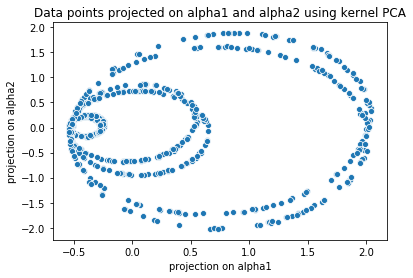

In [47]:
sns.scatterplot(mapped[:,0],mapped[:,1])
plt.xlabel('projection on alpha1')
plt.ylabel('projection on alpha2')
plt.title('Data points projected on alpha1 and alpha2 using kernel PCA')

###### For d=3:

In [48]:
p=3
K2=np.empty([1000,1000])
for i in range(n):
    for j in range(n):
        K2[i][j]=np.power((sum(np.multiply(data[:,i],data[:,j]))+1),p)

In [49]:
In2=np.empty([1000,1000])
In2.fill(1/1000)
Kc2=K2-np.matmul(In2,K2)-np.matmul(K2,In2)+np.matmul(np.matmul(In2,K2),In2)

In [50]:
eigenvalues_kc2, eigenvectors_kc2 = np.linalg.eig(Kc2)

s_kc2 = eigenvalues_kc2.argsort()[::-1]   
eigenvalues_kc2 = eigenvalues_kc2[s_kc]
eigenvectors_kc2 = eigenvectors_kc2[:,s_kc]

In [51]:
eigenvalues_kc2=eigenvalues_kc2.real
eigenvectors_kc2=eigenvectors_kc2.real

In [52]:
alpha2 = np.empty([1000,1000])
for i in range(1000):
    alpha2[:,i] = eigenvectors_kc2[:,i]/np.power(1000*abs(eigenvalues_kc2[i]),(1/2))

In [53]:
mapped2=np.matmul(Kc2,alpha2)
mapped2

array([[ 6.24726983e-02, -3.84366069e-01, -1.13976211e-01, ...,
        -7.45058060e-09,  3.60748663e-02, -7.84692622e-01],
       [ 5.94797707e-02, -3.69905030e-01, -1.08677681e-01, ...,
        -9.31322575e-09,  5.09320968e-02, -7.65732412e-01],
       [ 1.71510044e-02, -4.09609829e-01, -1.28384571e-01, ...,
        -9.31322575e-09, -5.27814264e-02, -7.56591790e-01],
       ...,
       [-6.74032125e+00, -1.50452306e+01,  4.21630665e+00, ...,
        -2.98023224e-08,  6.01226453e-02,  3.13263525e+00],
       [-1.71416963e+01,  1.38715483e+01,  1.05058492e+01, ...,
        -9.31322575e-08,  1.08081659e-03,  5.06909224e-01],
       [-1.84019163e+01, -6.90783842e+00, -7.60614046e+00, ...,
        -1.41561031e-07,  3.15325307e-02, -2.89874354e-01]])

Text(0.5, 1.0, 'Data points projected on alpha1 and alpha2 using kernel PCA')

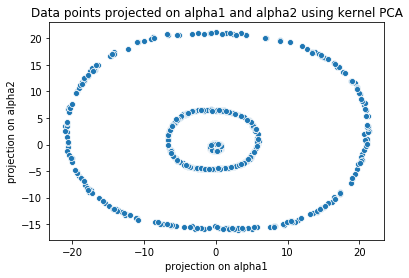

In [54]:
sns.scatterplot(mapped2[:,0],mapped2[:,1])
plt.xlabel('projection on alpha1')
plt.ylabel('projection on alpha2')
plt.title('Data points projected on alpha1 and alpha2 using kernel PCA')

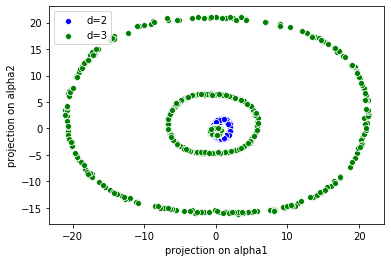

In [55]:
sns.scatterplot(mapped[:,0],mapped[:,1],color='blue',label='d=2')
sns.scatterplot(mapped2[:,0],mapped2[:,1], color='green',label='d=3')
plt.xlabel('projection on alpha1')
plt.ylabel('projection on alpha2')
plt.legend()

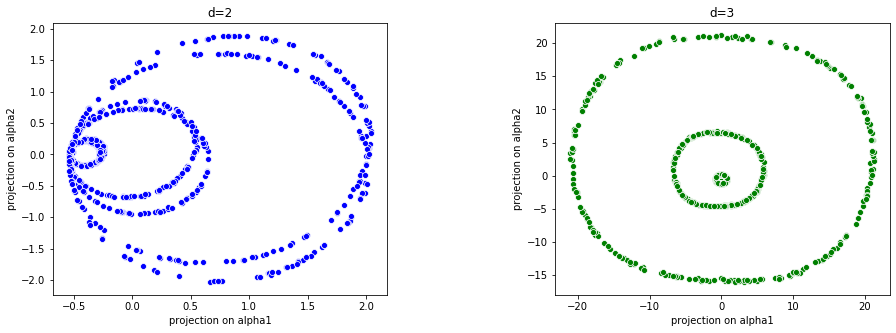

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(mapped[:,0],mapped[:,1],color='blue',ax=axes[0])
sns.scatterplot(mapped2[:,0],mapped2[:,1], color='green',ax=axes[1])
axes[0].set_xlabel('projection on alpha1')
axes[0].set_ylabel('projection on alpha2')
axes[1].set_xlabel('projection on alpha1')
axes[1].set_ylabel('projection on alpha2')
axes[0].set_title('d=2')
axes[1].set_title('d=3')
fig.subplots_adjust(wspace=0.5)

#### B. k(x, y) = exp −(x−y)T (x−y)/(2σ^2) for σ = {0.1, 0.2, . . . , 1}

C:\Users\V-ABHIGNA\anaconda3\lib\site-packages\ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Sigma = 1')

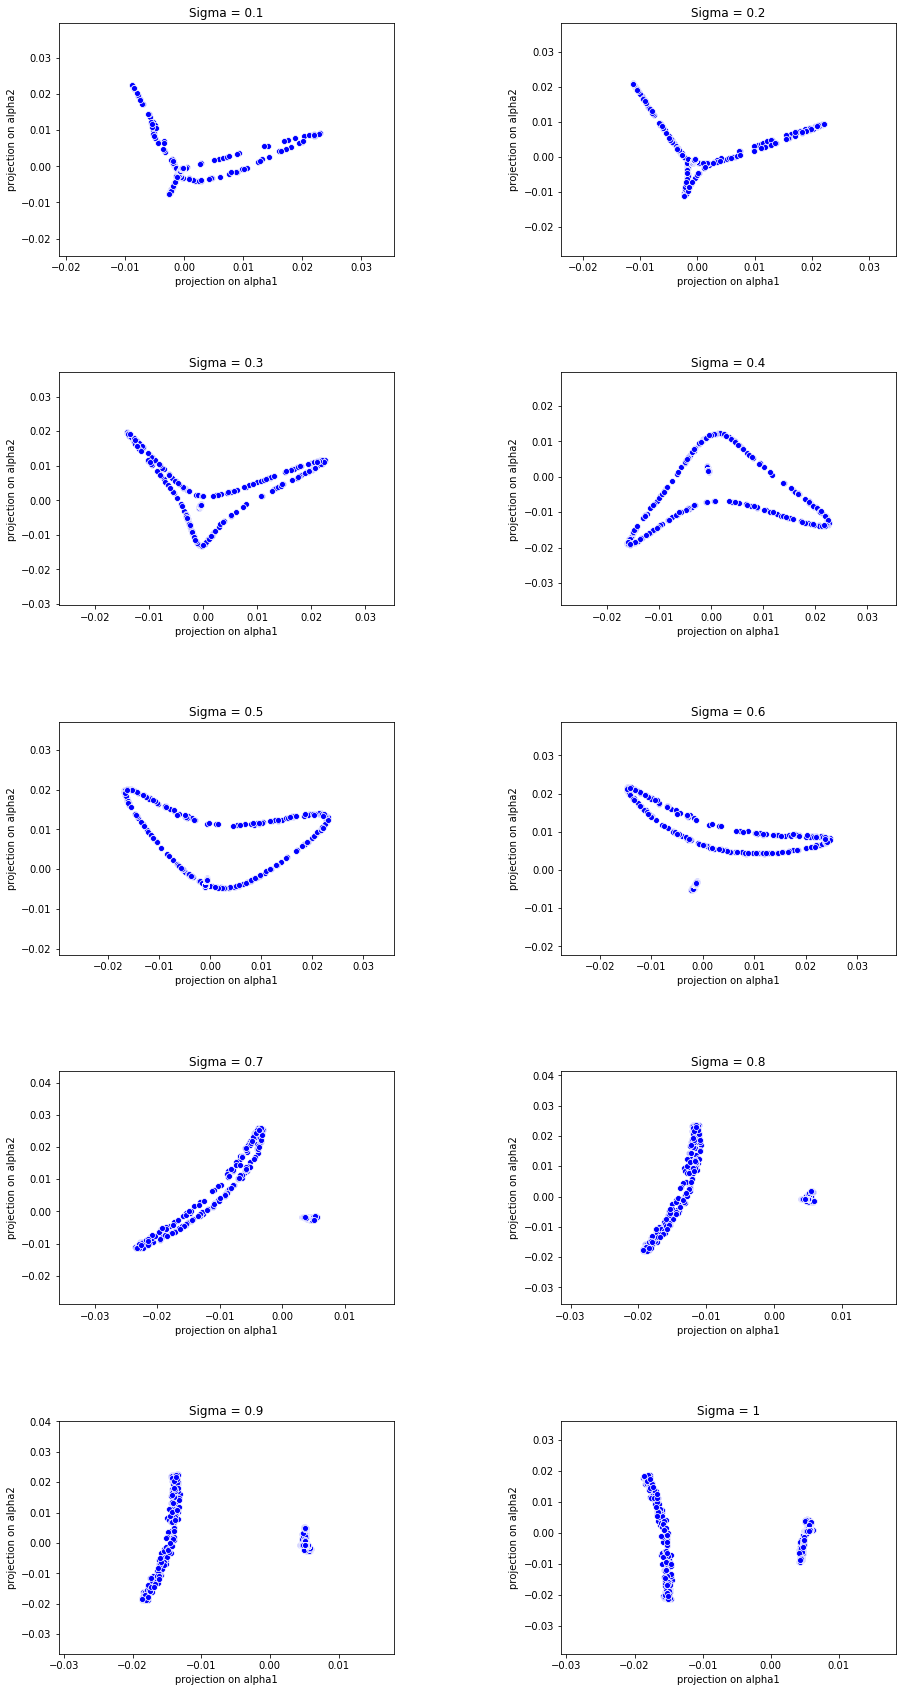

In [57]:
fig, axes = plt.subplots(5, 2, figsize=(15,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

sigma = 0.1
for o1 in range(5):
    for o2 in range(2):
        K_exp=np.empty([1000,1000])
        for i in range(n):
            for j in range(n):
                K_exp[i][j]=math.exp(-(np.matmul((data[:,i]-data[:,j]),(data[:,i]-data[:,j])))/(2*sigma*sigma))

        In_exp=np.empty([1000,1000])
        In_exp.fill(1/1000)

        Kc_exp=K_exp-np.matmul(In_exp,K_exp)-np.matmul(K_exp,In_exp)+np.matmul(np.matmul(In_exp,K_exp),In_exp)

        eigenvalues_kc_exp, eigenvectors_kc_exp = np.linalg.eig(Kc_exp)

        s_kc_exp = eigenvalues_kc_exp.argsort()[::-1]   
        eigenvalues_kc_exp = eigenvalues_kc_exp[s_kc_exp]
        eigenvectors_kc_exp = eigenvectors_kc_exp[:,s_kc_exp]

        alpha_exp = np.empty([1000,1000])
        for i in range(1000):
            alpha_exp[:,i] = eigenvectors_kc_exp[:,i]/np.power(1000*abs(eigenvalues_kc_exp[i]),(1/2))

        mapped_exp=np.matmul(Kc_exp,alpha_exp)

        sns.scatterplot(mapped_exp[:,0],mapped_exp[:,1],color='blue',ax=axes[o1][o2])
        axes[o1][o2].set_xlabel('projection on alpha1')
        axes[o1][o2].set_ylabel('projection on alpha2')

        sigma=sigma+0.1
        
axes[0][0].set_title('Sigma = 0.1')
axes[0][1].set_title('Sigma = 0.2')
axes[1][0].set_title('Sigma = 0.3')
axes[1][1].set_title('Sigma = 0.4')
axes[2][0].set_title('Sigma = 0.5')
axes[2][1].set_title('Sigma = 0.6')
axes[3][0].set_title('Sigma = 0.7')
axes[3][1].set_title('Sigma = 0.8')
axes[4][0].set_title('Sigma = 0.9')
axes[4][1].set_title('Sigma = 1')